In [51]:
import pandas as pd

# reading in file
fileName = "S01G1AllRawChannels.csv"

User_Frame = pd.read_csv(fileName)
User_Frame.drop("Unnamed: 14", axis=1, inplace= True)
# basically switches columns and rows so that we can turn it into an fif
transposed_df = User_Frame.transpose()
# print(transposed_df.shape)
display(transposed_df)


0        1        2        3        4         5        6         7      \
AF3 -35.1282 -32.5642 -27.1794 -32.0515 -27.1794 -29.48730 -34.6155 -30.76930   
AF4 -16.1538 -22.3079 -13.8459 -14.6157 -13.8462 -11.02560 -19.7437 -14.35890   
F3  -44.8718 -47.9487 -39.4871 -42.3079 -40.5127 -39.74370 -43.8462 -34.87180   
F4    1.7949 -11.0256  -3.0769  -4.3589  -5.1279  -0.25659  -9.4873  -2.05130   
F7   44.8716  40.2561  47.1794  42.3076  47.1797  49.99980  36.6667  44.10250   
F8   -1.7949 -16.7949  -1.7949   3.8462   0.0000   0.25659 -14.7434   0.25659   
FC5  -5.8975 -20.8975  -5.8975 -11.0259 -15.8975  -7.94850 -21.2820  -8.71780   
FC6  -3.8462  -2.8206  -1.5383  -2.3076   0.5127  -2.82060   1.7947  -2.05130   
O1   27.4360  20.2561  31.2820  22.3076  19.4873  27.94850  19.7434  25.12840   
O2  -10.5127   2.8206  -4.1028 -11.0259  -2.0513  -6.41040  -1.7947 -11.79490   
P7    5.8975  20.2561  10.2566   3.3330  10.7690   0.76929  13.5896   8.20510   
P8    7.9487   5.8972   9.7434   2.3076   0.0000   5.89720   5.3845   3.07710   
T7   12.5640  19.2307  17.9485   7.4355  11.7949  11.53830  13.5896  12.82030   
T8   18.2051   4.3591  11.2820  10.5127  11.2822  20.25660   8.9744  11.79490   

       8        9      ...    38242     38243    38244    38245    38246  \
AF3 -28.7180 -23.0769  ...  21.0256  30.00000  45.0000  30.5129  26.1538   
AF4 -12.3076 -13.8462  ...   4.1025  11.02540  20.7690   6.9231  14.8718   
F3  -29.7437 -26.1541  ...  -4.1025   7.94870  22.8203   7.8203   1.5386   
F4    0.0000  -1.5386  ... -22.5640  -7.56400   3.3335 -11.6665 -23.5898   
F7   44.6152  44.6152  ... -15.8975  -0.89746  -3.3335 -18.3335 -22.5642   
F8    4.1025  -4.1025  ... -55.7693 -40.76930 -35.1282 -50.1282 -56.9231   
FC5  -7.1797  -9.2310  ... -49.8717 -34.87170 -21.7949 -36.7949 -46.6667   
FC6  -4.6152  -0.5127  ...  55.8975  40.89750  25.8975  40.8975  55.8975   
O1   23.0771  23.0767  ... -85.6409 -70.64090 -55.6409 -70.6409 -85.6409   
O2   -7.6924   2.0513  ...  25.7693  10.76930  -4.2307  10.7693  25.7693   
P7    0.0000  11.7949  ...   7.1794  -7.82060 -22.8206  -7.8206   7.1794   
P8    2.0513   0.5127  ...   9.7437   3.84620   6.9233  -6.9231  -1.5386   
T7    9.2310  16.4102  ...  81.5386  66.53860  76.6665  74.1023  75.8972   
T8   13.3335  10.7690  ... -28.2051 -13.20510   1.7949 -13.2051 -28.2051   

       38247    38248    38249    38250    38251  
AF3  30.0001  32.8203  25.6409  33.8462  36.9229  
AF4  17.6923  27.6924  24.6155  26.1538  14.8716  
F3   -2.3077   8.7178   9.2307   9.7437   5.6409  
F4  -22.3077  -7.3077   6.6667  -8.3333 -23.3333  
F7  -20.7692 -15.8975 -20.5127  -5.5127  -2.0513  
F8  -61.7948 -46.7948 -31.7948 -23.0769 -38.0769  
FC5 -41.2819 -26.2819 -32.8206 -20.0000 -35.0000  
FC6  60.2565  45.2565  30.2565  36.4102  51.4102  
O1  -70.6409 -55.6409 -70.6409 -56.4102 -49.2307  
O2   40.7693  25.7693  10.7693   8.2051  18.4614  
P7   10.0001  -4.9999 -19.9999  -7.6924   2.0513  
P8    2.3077  17.3077   8.7180  -2.5640  -2.5642  
T7   71.5387  69.2305  72.3079  76.4102  67.1797  
T8  -30.5128 -15.5128 -13.3333 -21.0256 -18.4617  

[14 rows x 38252 columns]

In [28]:
import mne

n_channels = len(transposed_df)
ch_names = list(transposed_df.index.values)
ch_types = ['eeg']*14

samp_freq = 128 #defined on first line? not sure, this is in hertz


info = mne.create_info(ch_names, ch_types=ch_types, sfreq = samp_freq)

# print(info)
raw = mne.io.RawArray(transposed_df, info)  
# raw.plot()


Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.


In [29]:
# only necessary if we want to save the fif file for some reason, otherwise we can just use the "raw" object in our calculations
raw.save('Data1raw.fif', overwrite=True)

# if we were to read the raw file in we would use
# raw = mne.io.read_raw_fif('Data1.fif')

Overwriting existing file.
Writing /Users/annaburns/Desktop/SoundField/Sprints/Sprint6/Data1raw.fif
Closing /Users/annaburns/Desktop/SoundField/Sprints/Sprint6/Data1raw.fif
[done]


In [31]:
raw2 = mne.io.read_raw_fif('Data1raw.fif')
# raw2.info['chs']

Opening raw data file Data1raw.fif...
Isotrak not found
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.


In [32]:
from mne.datasets import eegbci

# set channel names
eegbci.standardize(raw2)

# set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw2.set_montage(montage)

<Raw | Data1raw.fif, 14 x 38252 (298.8 s), ~27 kB, data not loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


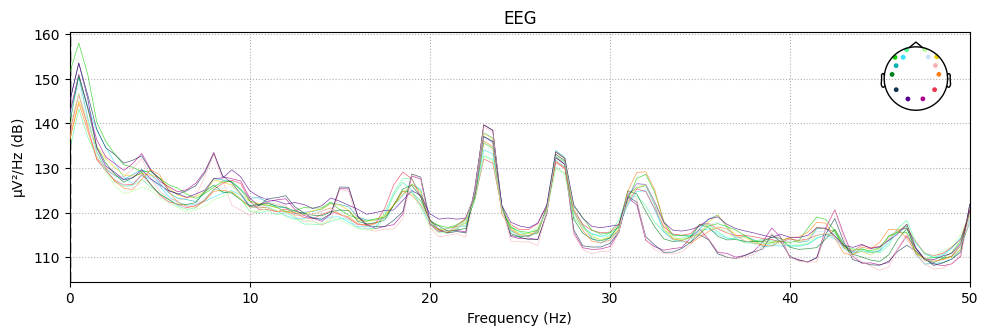

In [33]:
# this is the power spectral density of each sensor
raw2.plot_psd(fmax=50)
# raw2.plot(duration=1, n_channels=14)

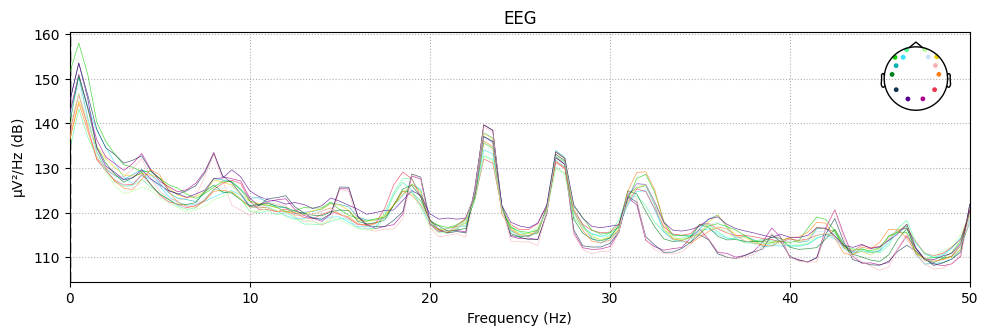

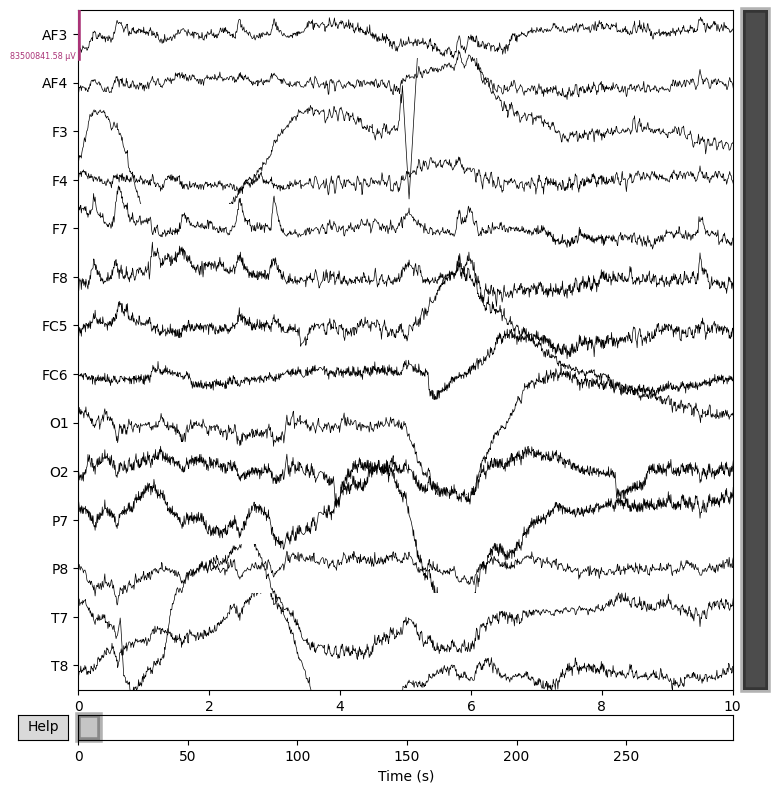

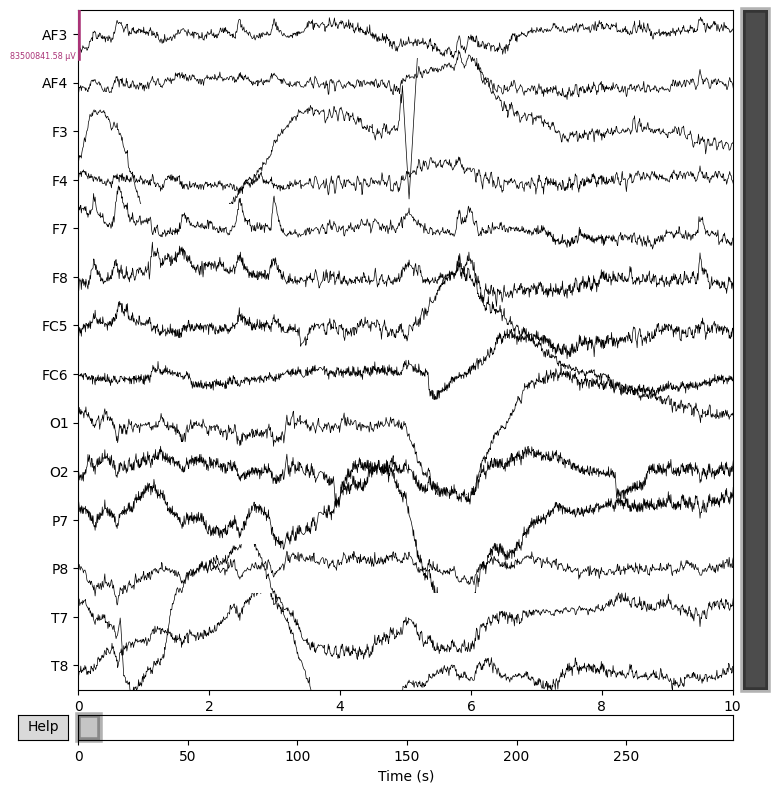

In [34]:
raw2.plot(n_channels=14, scalings='auto')

Reading 0 ... 38251  =      0.000 ...   298.836 secs...


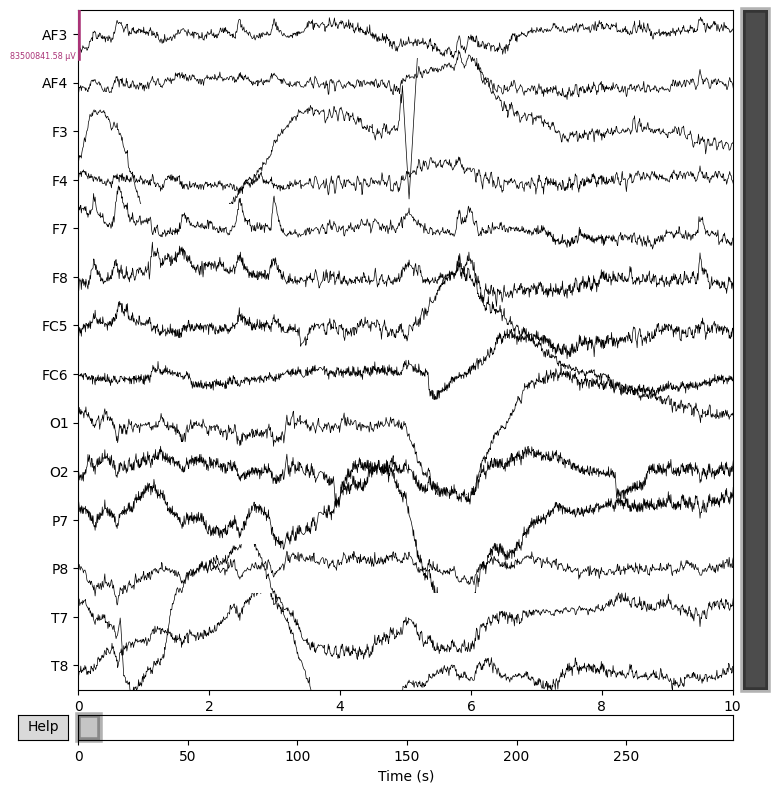

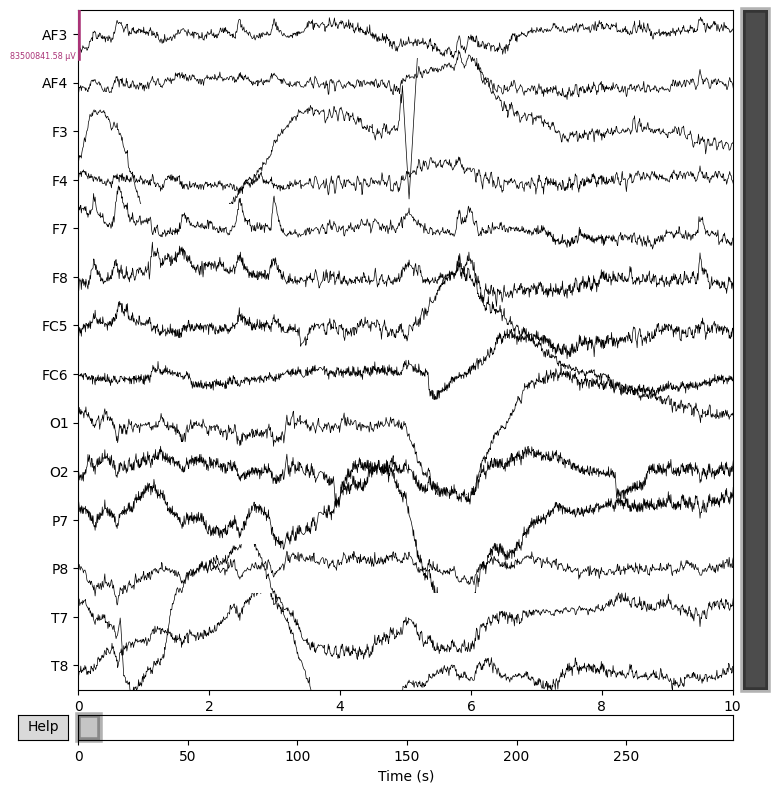

In [35]:
import os
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

# Here we'll crop to 60 seconds and drop gradiometer channels for speed 
# raw2.crop(tmax=60.).pick_types(meg='mag', eeg=True, stim=True, eog=True)
raw2.load_data()
raw2.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


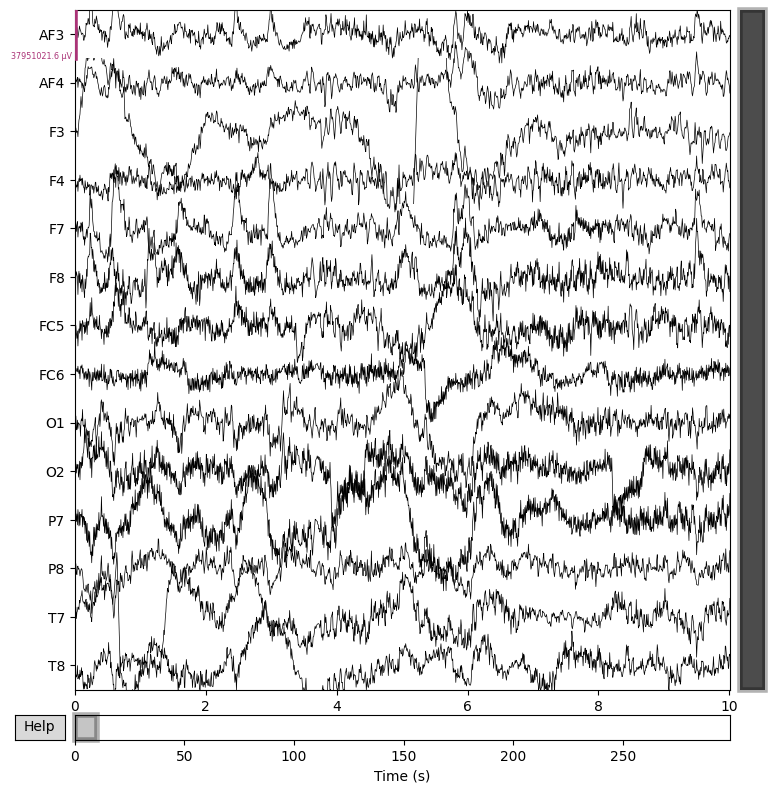

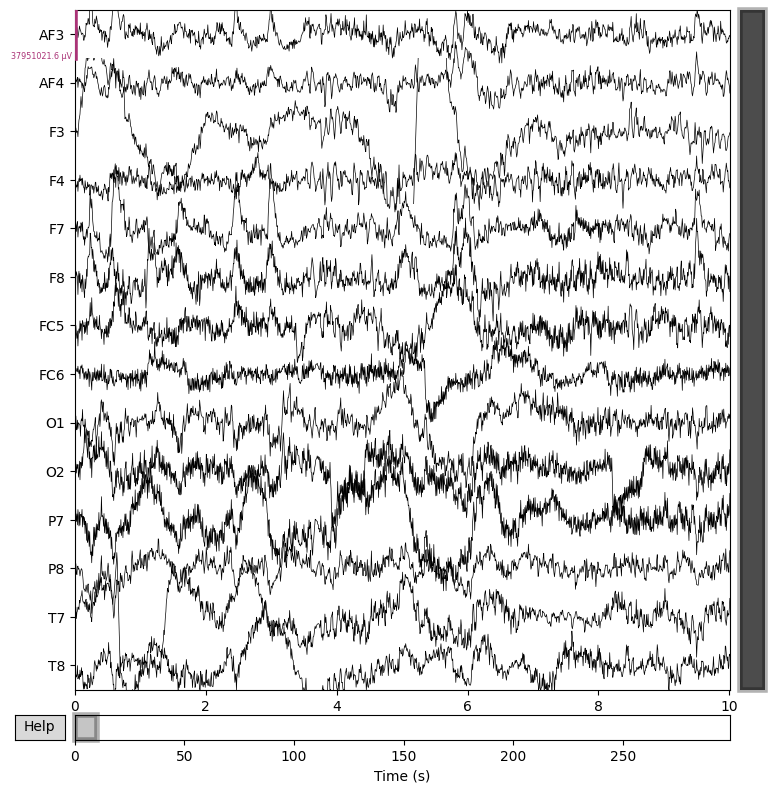

In [36]:
# set notch filter
# raw2.notch_filter(60)

raw2.filter(l_freq=1.0, h_freq=50.0) # only keeping frequencies between 1-50 Hz

raw2.info['sfreq']

raw2.plot(scalings='auto')

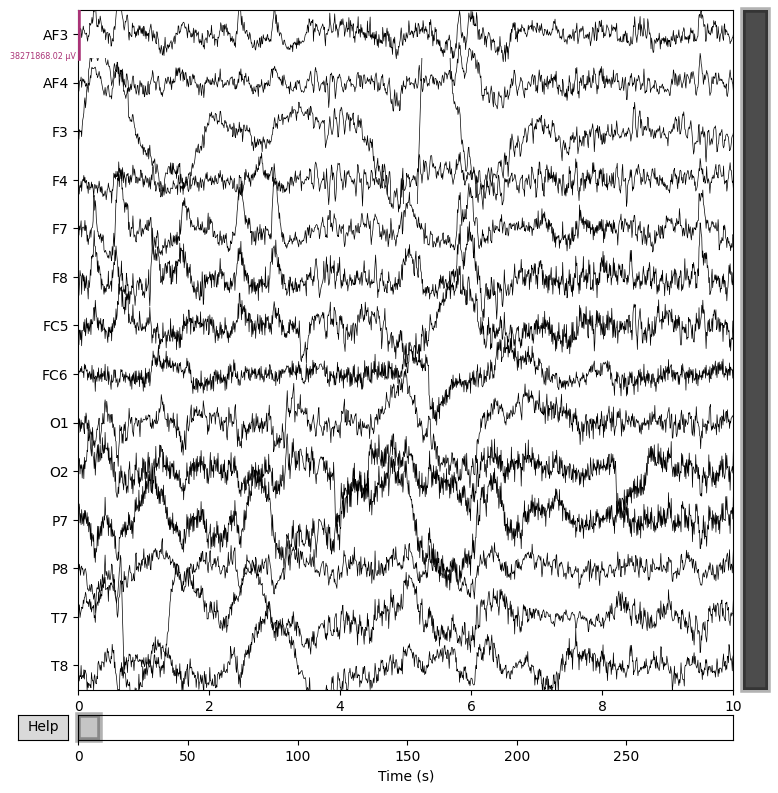

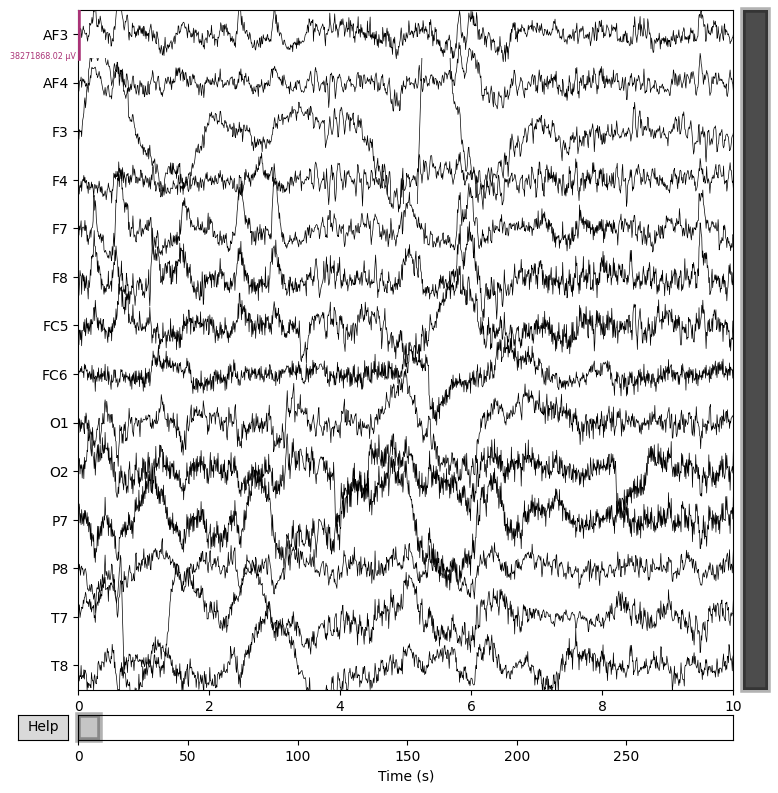

In [37]:

import matplotlib
# Downsample a lot
raw2.resample(120, npad='auto')
# raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=60, average=False, spatial_colors=True, xscale='log');
raw2.plot(scalings='auto')
# Notice that the max plotted frequency is 60, the nyquist rate!

In [38]:
# raw2.plot(start=5, duration=5)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 397 samples (3.308 sec)

Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Selecting by number: 14 components
Fitting ICA took 0.8s.


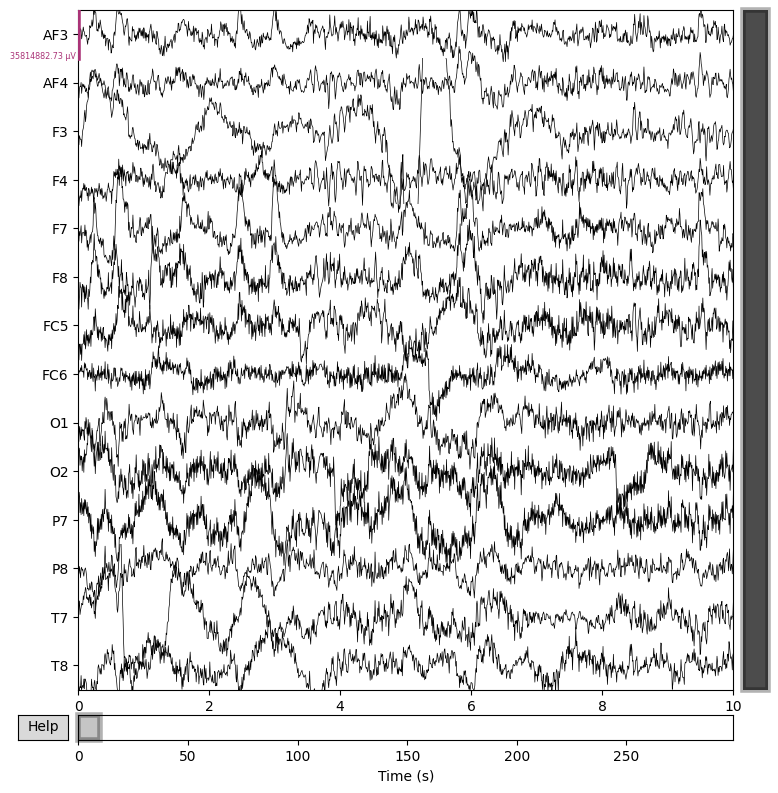

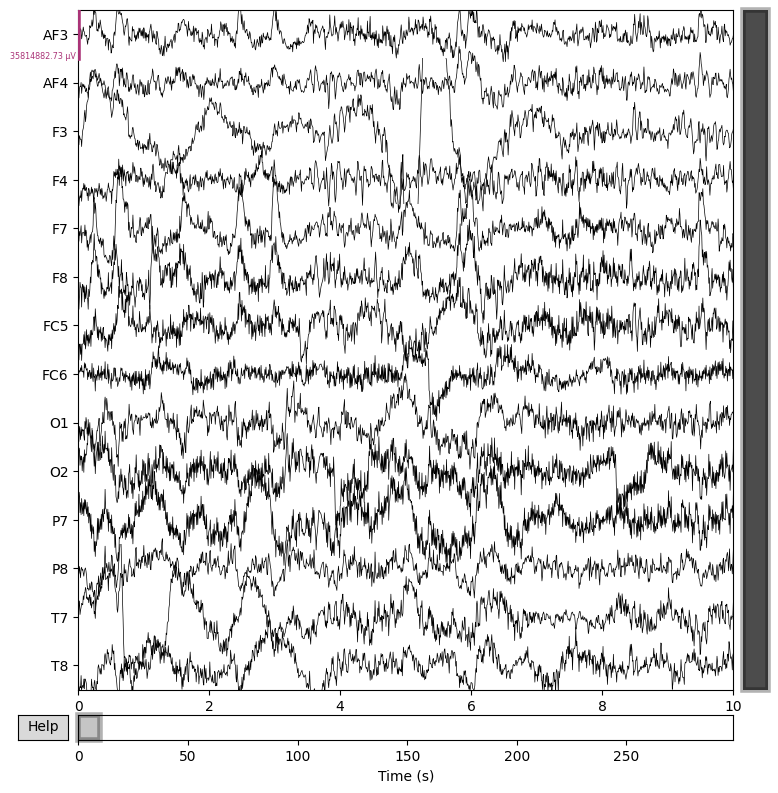

In [39]:
filt_raw = raw2.copy().filter(l_freq=1., h_freq=None)
ica = ICA(n_components=14, max_iter='auto', random_state=97)
ica.fit(filt_raw)
ica
filt_raw.plot(scalings='auto')

In [40]:
print(filt_raw.get_data().shape)
print(raw2.get_data().shape)
print(raw.get_data().shape)

(14, 35861)
(14, 35861)
(14, 38252)


Using matplotlib as 2D backend.


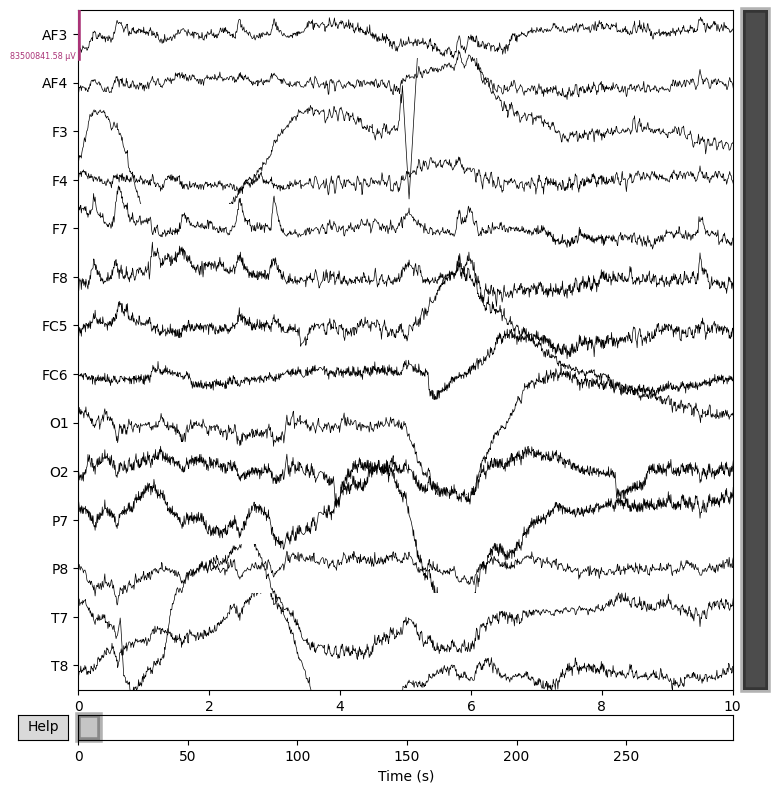

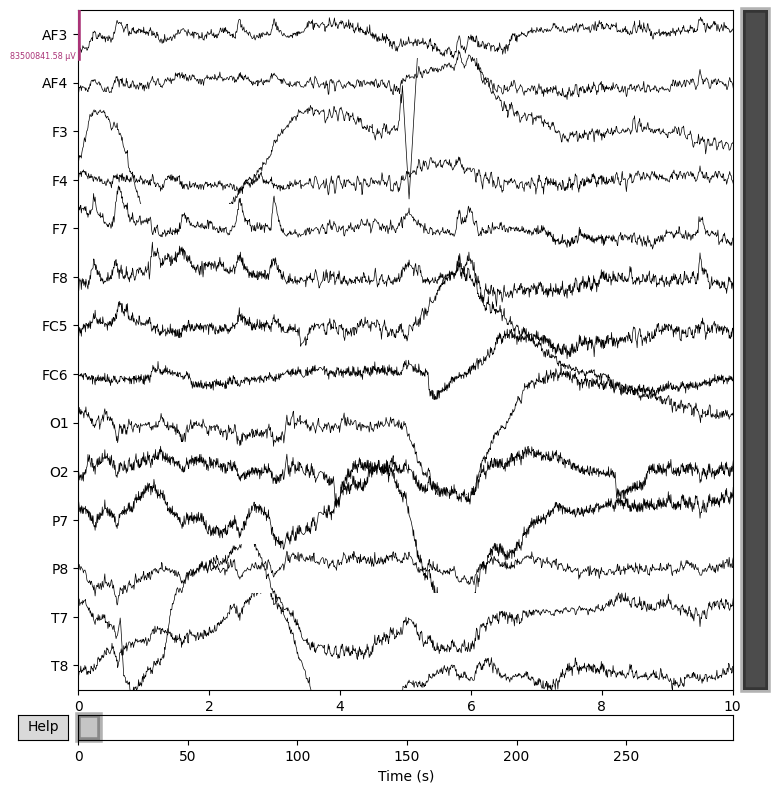

In [2]:
raw2.plot(n_channels=14, scalings='auto')

In [42]:
# Here we'll crop to 60 seconds and drop gradiometer channels for speed 
# raw2.crop(tmax=60.).pick_types(meg='mag', eeg=True, stim=True, eog=True) CROP does not work
raw2.load_data()
# raw2.plot(scalings='auto')


Reading 0 ... 38251  =      0.000 ...   298.836 secs...


<Raw | Data1raw.fif, 14 x 38252 (298.8 s), ~4.1 MB, data loaded>

In [8]:
#

In [43]:
ica = mne.preprocessing.ICA(n_components=14, random_state=97, max_iter='auto')
ica.fit(raw2)
# ica.exclude = [1, 2]  # details on how we picked these are omitted here
# ica.plot_properties(raw, picks=ica.exclude)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


/var/folders/0v/f9chsbzs06z9v0zl61n4lws40000gn/T/ipykernel_2407/1263385864.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw2)


Fitting ICA took 2.2s.


<ICA | raw data decomposition, method: fastica (fit in 37 iterations on 38252 samples), 14 ICA components (14 PCA components available), channel types: eeg, no sources marked for exclusion>

In [44]:
ica.exclude = [1, 2]  # details on how we picked these are omitted here
# ica.plot_properties(raw, picks=ica.exclude)

In [45]:
print(filt_raw.get_data().shape)
print(raw2.get_data().shape)
print(raw.get_data().shape)

(14, 35861)
(14, 38252)
(14, 38252)


In [12]:
#  high pass filtering
filt_raw = raw2.copy().filter(l_freq=2., h_freq=None)
# ica = ICA(n_components=14, max_iter='auto', random_state=97)
# ica.fit(filt_raw)
# ica
# filt_raw.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Filter length: 213 samples (1.664 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


In [13]:
ica = mne.preprocessing.ICA(n_components=14, random_state=97, max_iter='auto')
ica.fit(filt_raw)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 21.6s.


<ICA | raw data decomposition, method: fastica (fit in 17 iterations on 38252 samples), 14 ICA components (14 PCA components available), channel types: eeg, no sources marked for exclusion>

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
149 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
149 matching events found
No baseline correction applied
0 projection items activated


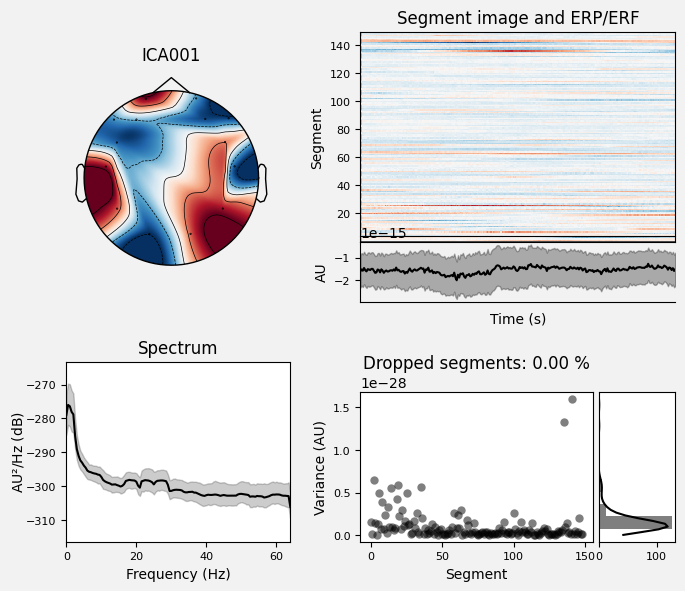

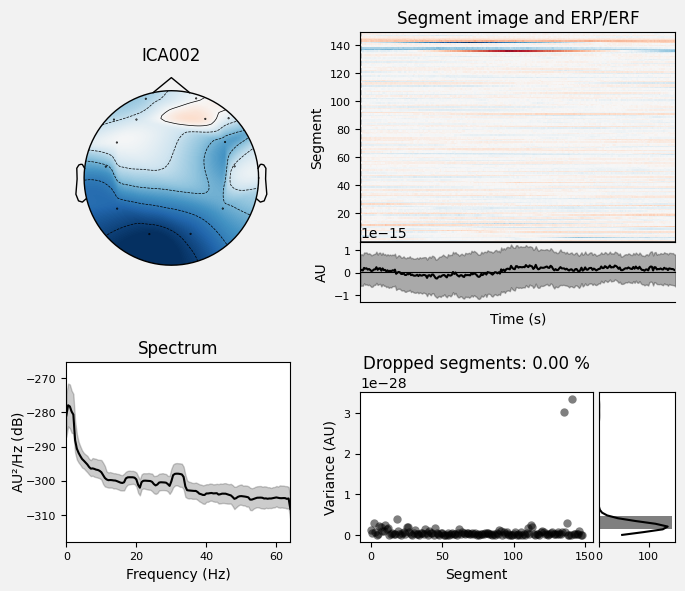

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [19]:
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw2, picks=ica.exclude)

In [20]:
orig_raw = raw2.copy()
raw2.load_data()
ica.apply(raw2)

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components


<Raw | Data1raw.fif, 14 x 38252 (298.8 s), ~4.1 MB, data loaded>

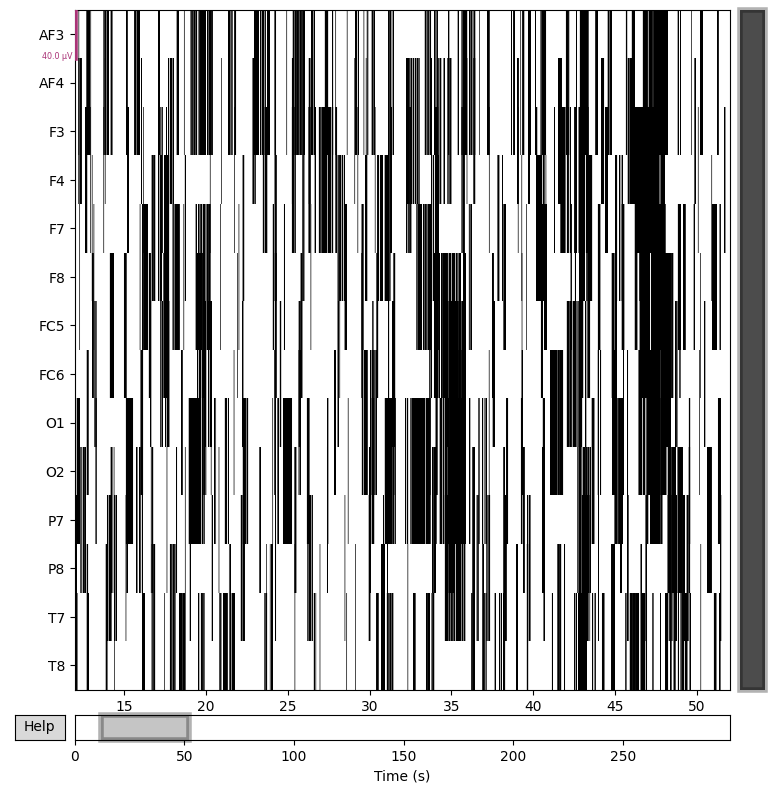

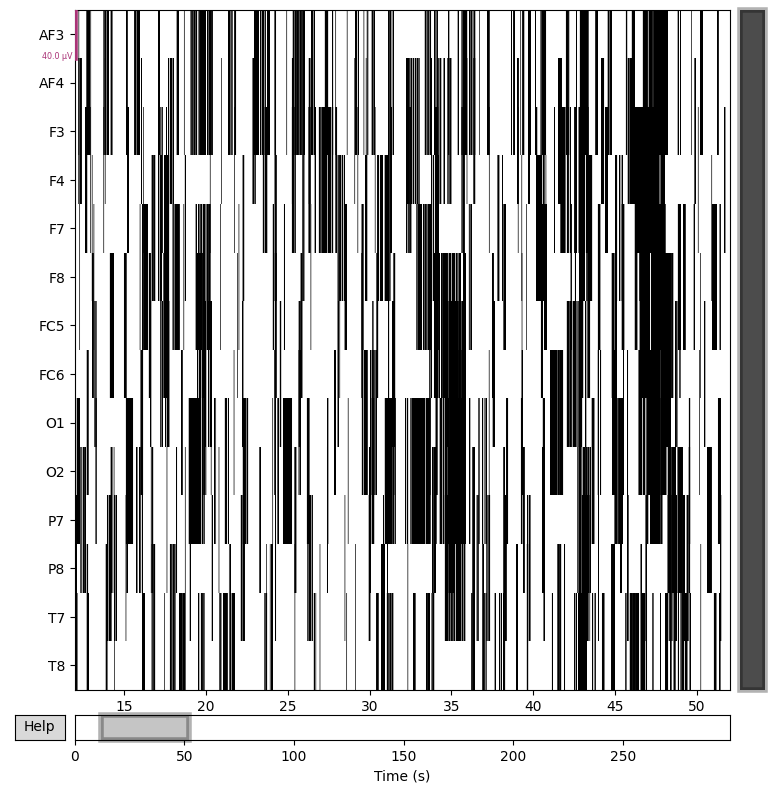

In [22]:
# orig_raw.plot(start=12, duration=40)

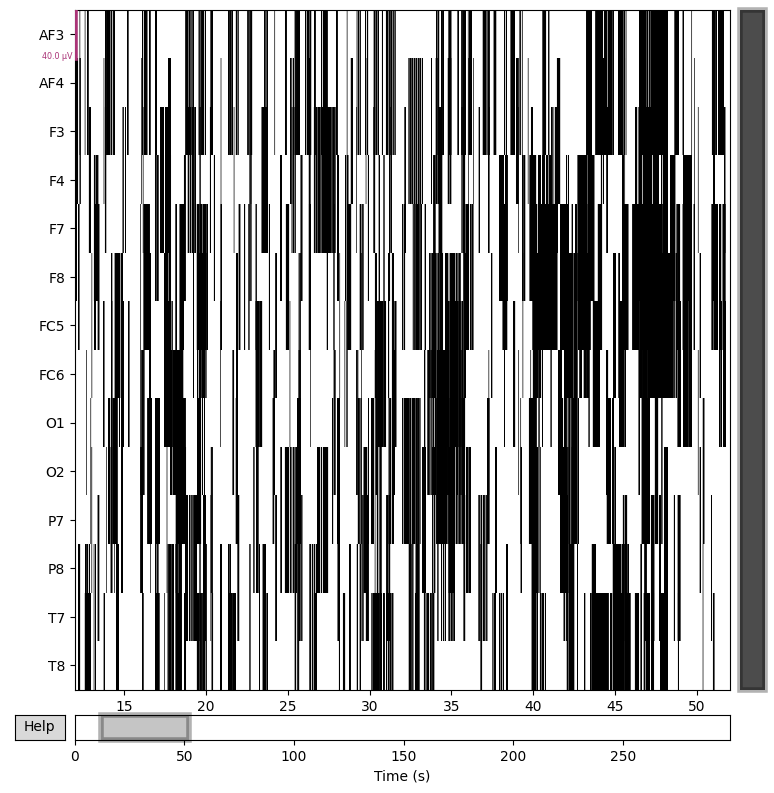

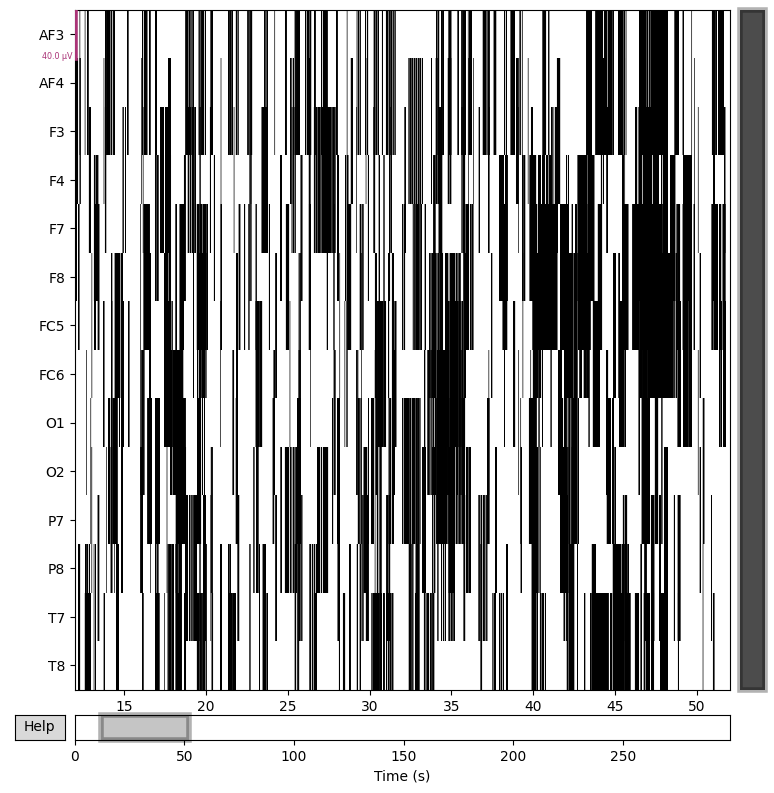

In [23]:
# raw.plot(start=12, duration=40)

In [27]:
# events = mne.find_events(raw2, stim_channel='AF3')
# print(events[:5])  # show the first 5

Trigger channel has a non-zero initial value of 25 (consider using initial_event=True to detect this event)
17286 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 137 139 141 142 143 145 151]


/var/folders/0v/f9chsbzs06z9v0zl61n4lws40000gn/T/ipykernel_2407/314313332.py:1: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events = mne.find_events(raw2, stim_channel='AF3')


ValueError: You have 7580 events shorter than the shortest_event. These are very unusual and you may want to set min_duration to a larger value e.g. x / raw.info['sfreq']. Where x = 1 sample shorter than the shortest event length.